## Granite docling 258M mlx

Dependencies:

mlx-vlm

In [1]:
from docling.datamodel import vlm_model_specs
from docling_core.types.doc import ImageRefMode
from docling_core.types.doc.document import DoclingDocument, DocTagsDocument
from mlx_vlm import load, stream_generate
from mlx_vlm.prompt_utils import apply_chat_template
from mlx_vlm.utils import load_config
from transformers.image_utils import load_image

### PDF input

In [2]:
source = "JD.pdf"

In [3]:
from docling.datamodel import vlm_model_specs
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    VlmPipelineOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline

In [4]:
converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(
            pipeline_cls=VlmPipeline,
            pipeline_options=VlmPipelineOptions(
                vlm_options=vlm_model_specs.GRANITEDOCLING_MLX
            ),
        ),
    }
)

In [5]:
doc = converter.convert(source=source).document

2025-10-18 22:57:25,057 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-10-18 22:57:25,102 - INFO - Going to convert document batch...
2025-10-18 22:57:25,103 - INFO - Initializing pipeline for VlmPipeline with options hash e58bc69b0ac7e3ef286a71274276cf73
2025-10-18 22:57:25,109 - INFO - Loading plugin 'docling_defaults'
2025-10-18 22:57:25,110 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-10-18 22:57:26,231 - INFO - Processing document JD.pdf
2025-10-18 23:01:20,785 - INFO - Finished converting document JD.pdf in 235.73 sec.


In [7]:
doc.save_as_html("./output.html")

### Image input

In [8]:
# Configuration
MODEL_PATH = "ibm-granite/granite-docling-258M-mlx"
PROMPT = "Convert this page to docling."
SHOW_IN_BROWSER = True

In [9]:
# Load model and processor
print("Loading model...")
model, processor = load(MODEL_PATH)
config = load_config(MODEL_PATH)

Loading model...


In [10]:
model

Model(
  (vision_model): VisionModel(
    (embeddings): VisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), padding=(0, 0), dilation=1, groups=1, bias=True)
      (position_embedding): Embedding(1024, 768)
    )
    (encoder): Encoder(
      (layers.0): EncoderLayer(
        (self_attn): Attention(
          (q_proj): Linear(input_dims=768, output_dims=768, bias=True)
          (k_proj): Linear(input_dims=768, output_dims=768, bias=True)
          (v_proj): Linear(input_dims=768, output_dims=768, bias=True)
          (out_proj): Linear(input_dims=768, output_dims=768, bias=True)
        )
        (layer_norm1): LayerNorm(768, eps=1e-06, affine=True)
        (mlp): MLP(
          (activation_fn): GELU()
          (fc1): Linear(input_dims=768, output_dims=3072, bias=True)
          (fc2): Linear(input_dims=3072, output_dims=768, bias=True)
        )
        (layer_norm2): LayerNorm(768, eps=1e-06, affine=True)
      )
      (layers.1): Encoder

In [11]:
model.parameters()["vision_model"]["embeddings"]["patch_embedding"]["weight"].shape

(768, 16, 16, 3)

In [12]:
model.__class__

mlx_vlm.models.idefics3.idefics3.Model

In [13]:
import mlx.core as mx

In [14]:
# Get parameters (the nested dictionary)
params = model["model"] if isinstance(model, dict) and "model" in model else model
params

Model(
  (vision_model): VisionModel(
    (embeddings): VisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), padding=(0, 0), dilation=1, groups=1, bias=True)
      (position_embedding): Embedding(1024, 768)
    )
    (encoder): Encoder(
      (layers.0): EncoderLayer(
        (self_attn): Attention(
          (q_proj): Linear(input_dims=768, output_dims=768, bias=True)
          (k_proj): Linear(input_dims=768, output_dims=768, bias=True)
          (v_proj): Linear(input_dims=768, output_dims=768, bias=True)
          (out_proj): Linear(input_dims=768, output_dims=768, bias=True)
        )
        (layer_norm1): LayerNorm(768, eps=1e-06, affine=True)
        (mlp): MLP(
          (activation_fn): GELU()
          (fc1): Linear(input_dims=768, output_dims=3072, bias=True)
          (fc2): Linear(input_dims=3072, output_dims=768, bias=True)
        )
        (layer_norm2): LayerNorm(768, eps=1e-06, affine=True)
      )
      (layers.1): Encoder

In [15]:
res = []

def count_params(tree):
    """Recursively count parameters in nested dicts of mlx arrays."""
    total = 0
    if isinstance(tree, dict):
        for v in tree.values():
            total += count_params(v)
    # elif isinstance(tree, (list, tuple)):
    #     for v in tree:
    #         total += count_params(v)
    elif isinstance(tree, mx.array):
        res.append(tree)
        total += tree.size
    return total

total_params = count_params(params)
print(f"Total parameters: {total_params:,}")

Total parameters: 124,062,528


In [16]:
config

{'image_token_id': 100270,
 'use_cache': True,
 'tie_word_embeddings': False,
 'vision_config': {'return_dict': True,
  'output_hidden_states': False,
  'torchscript': False,
  'dtype': None,
  'pruned_heads': {},
  'tie_word_embeddings': True,
  'chunk_size_feed_forward': 0,
  'is_encoder_decoder': False,
  'is_decoder': False,
  'cross_attention_hidden_size': None,
  'add_cross_attention': False,
  'tie_encoder_decoder': False,
  'architectures': None,
  'finetuning_task': None,
  'id2label': {0: 'LABEL_0', 1: 'LABEL_1'},
  'label2id': {'LABEL_0': 0, 'LABEL_1': 1},
  'task_specific_params': None,
  'problem_type': None,
  'tokenizer_class': None,
  'prefix': None,
  'bos_token_id': None,
  'pad_token_id': None,
  'eos_token_id': None,
  'sep_token_id': None,
  'decoder_start_token_id': None,
  'max_length': 20,
  'min_length': 0,
  'do_sample': False,
  'early_stopping': False,
  'num_beams': 1,
  'temperature': 1.0,
  'top_k': 50,
  'top_p': 1.0,
  'typical_p': 1.0,
  'repetition_pe

In [17]:
SAMPLE_IMAGE = "sample_invoice.jpg"
pil_image = load_image(SAMPLE_IMAGE)

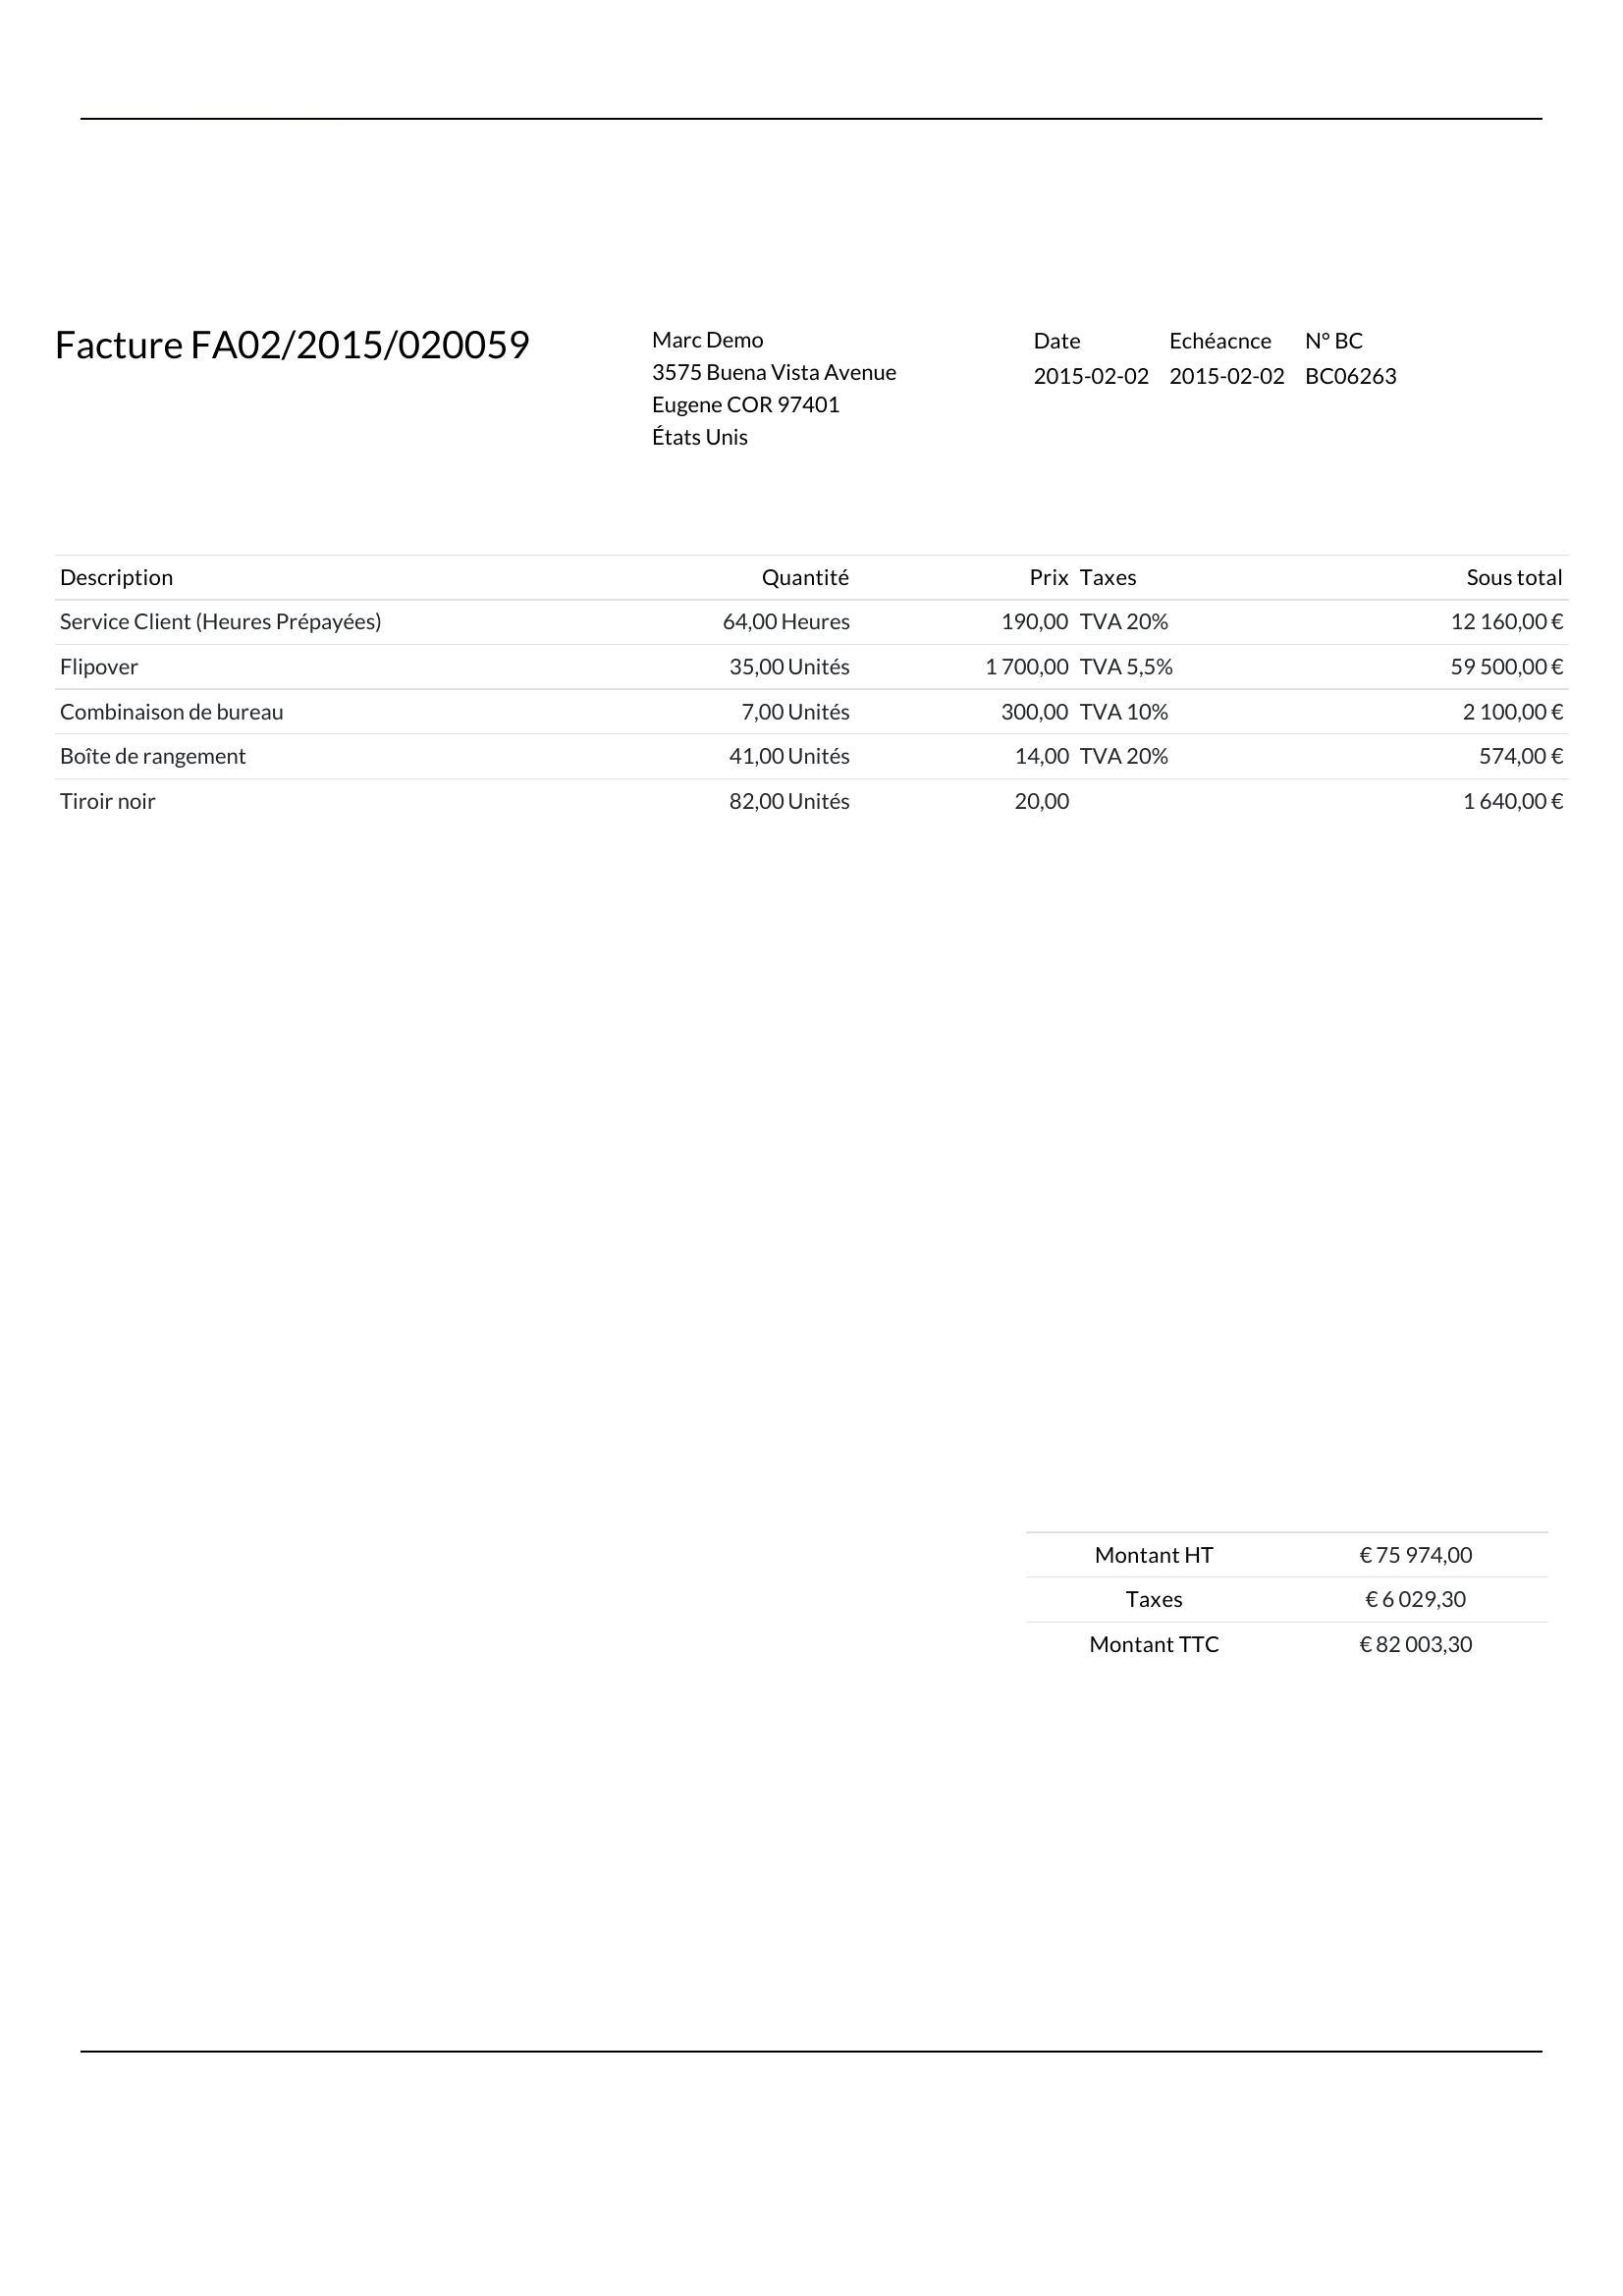

In [18]:
pil_image

In [19]:
formatted_prompt = apply_chat_template(processor, config, PROMPT, num_images=1)
formatted_prompt

'<|start_of_role|>user<|end_of_role|><image>Convert this page to docling.<|end_of_text|>\n<|start_of_role|>assistant<|end_of_role|>'

In [20]:
# Generate DocTags output
print("Generating DocTags...\n")
output = ""
for token in stream_generate(
    model, processor, formatted_prompt, [pil_image], max_tokens=4096, verbose=False
):
    output += token.text
    print(token.text, end="")
    if "</doctag>" in token.text:
        break

Generating DocTags...

<doctag><section_header_level_1><loc_17><loc_70><loc_164><loc_80>Facture FA02/2015/020059</section_header_level_1>
<text><loc_201><loc_70><loc_277><loc_100>Marc Demo 3575 Buena Vista Avenue Eugene COR 97401 États Unis</text>
<text><loc_319><loc_70><loc_350><loc_77>Date</text>
<text><loc_359><loc_70><loc_408><loc_77>Echéacnce</text>
<text><loc_416><loc_70><loc_420><loc_77>N</text>
<text><loc_425><loc_70><loc_420><loc_77>BC</text>
<text><loc_319><loc_77><loc_350><loc_84>2015-02-02</text>
<text><loc_359><loc_77><loc_408><loc_84>2015-02-02</text>
<text><loc_416><loc_77><loc_420><loc_84>BC</text>
<text><loc_425><loc_77><loc_435><loc_84>06263</text>
<otsl><loc_16><loc_122><loc_483><loc_180><fcel>Description<fcel>Quantité<fcel>Prix<fcel>Taxes<fcel>Sous total<nl><fcel>Service Client (Heures Prépayées)<fcel>64,00 Heures<fcel>190,00<fcel>TVA 20%<fcel>12 160,00 €<nl><fcel>Flipover<fcel>35,00 Unités<fcel>1 700,00<fcel>TVA 5,5%<fcel>59 500,00 €<nl><fcel>Combinaison de bureau<

In [21]:
print("Processing output...")

# Create DoclingDocument from generated DocTags
doctags_doc = DocTagsDocument.from_doctags_and_image_pairs([output], [pil_image])
doc = DoclingDocument.load_from_doctags(doctags_doc, document_name="Sample Document")

Processing output...


In [22]:
# Export to different formats
print("Markdown output:\n")
print(doc.export_to_markdown())

Markdown output:

## Facture FA02/2015/020059

Marc Demo 3575 Buena Vista Avenue Eugene COR 97401 États Unis

Date

Echéacnce

N

BC

2015-02-02

2015-02-02

BC

06263

| Description                       | Quantité     | Prix     | Taxes    | Sous total   |
|-----------------------------------|--------------|----------|----------|--------------|
| Service Client (Heures Prépayées) | 64,00 Heures | 190,00   | TVA 20%  | 12 160,00 €  |
| Flipover                          | 35,00 Unités | 1 700,00 | TVA 5,5% | 59 500,00 €  |
| Combinaison de bureau             | 7,00 Unités  | 300,00   | TVA 10%  | 2 100,00 €   |
| Boîte de rangement                | 41,00 Unités | 14,00    | TVA 20%  | 574,00 €     |
| Tiroir noir                       | 82,00 Unités | 20,00    |          | 1 640,00 €   |

| Montant HT   | € 75 974,00   |
|--------------|---------------|
| Taxes        | € 6 029,30    |
| Montant TTC  | € 82 003,30   |


In [23]:
# Save as HTML with embedded images
output_path = "./output_2.html"
doc.save_as_html(output_path, image_mode=ImageRefMode.EMBEDDED)
print(f"\nHTML saved to: {output_path}")


HTML saved to: ./output_2.html


### Other example

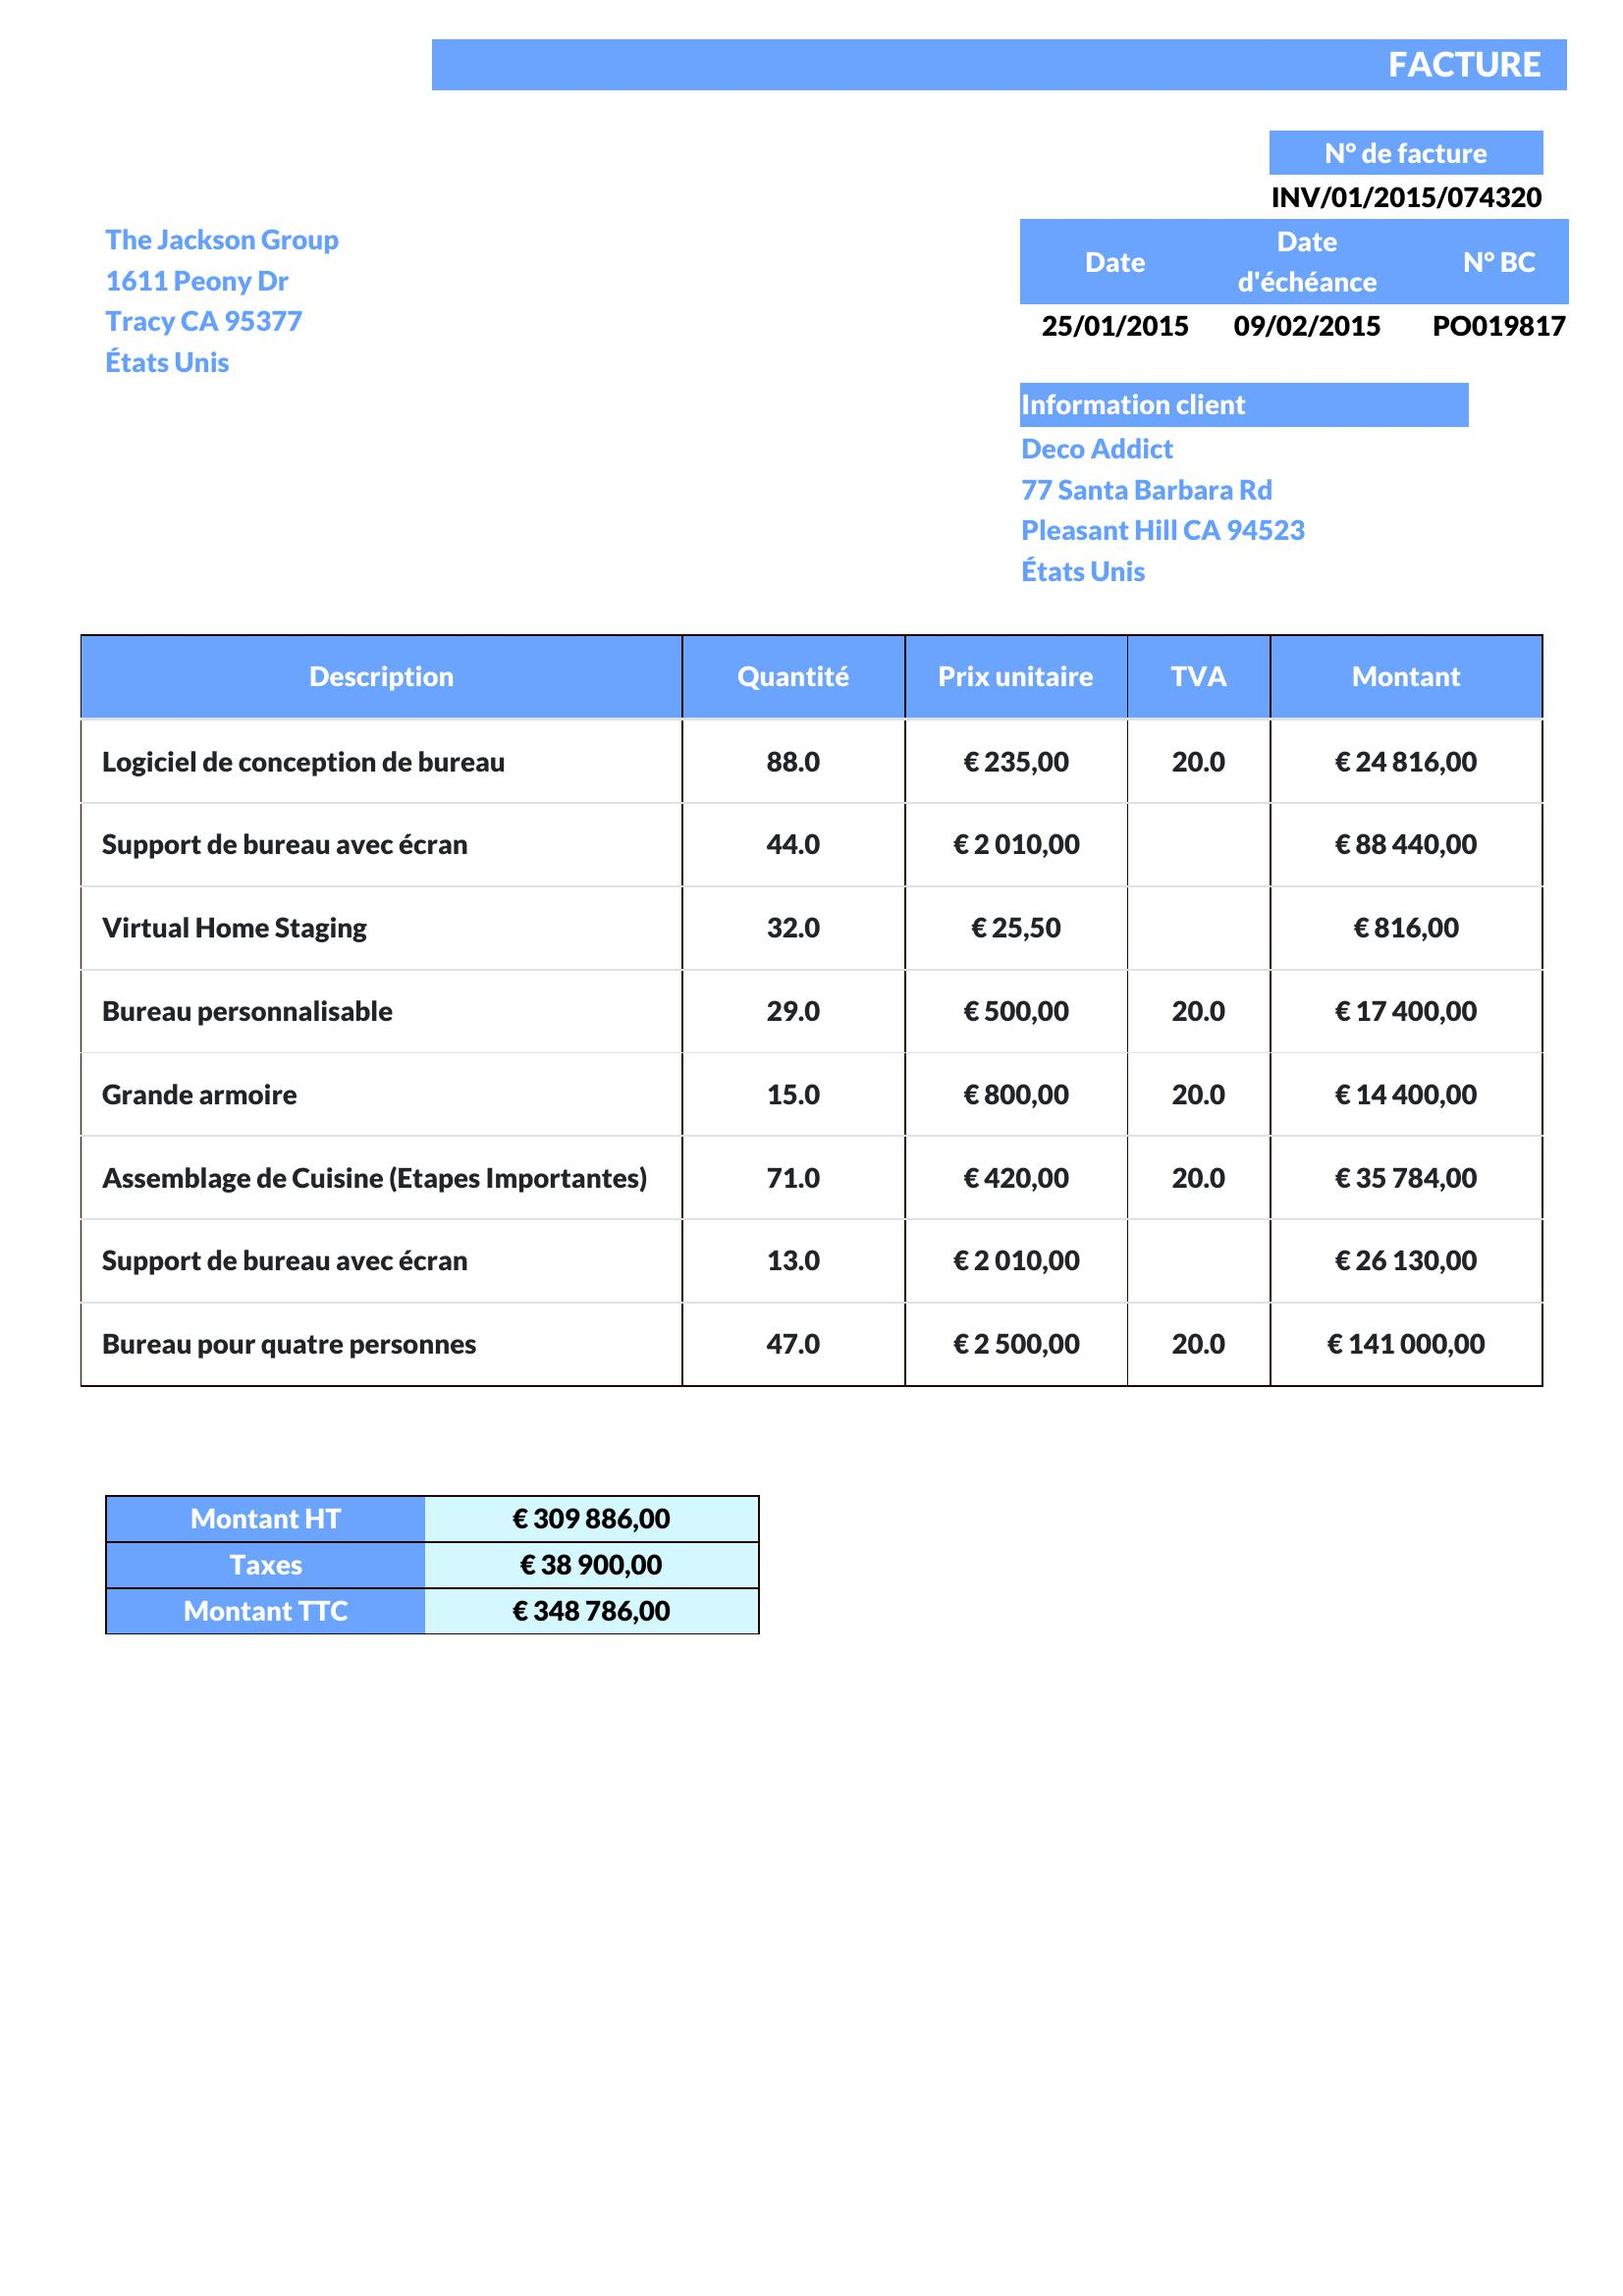

In [24]:
pil_image = load_image("sample_invoice_3.jpg")
pil_image

In [25]:
# Generate DocTags output
print("Generating DocTags...\n")
output = ""
for token in stream_generate(
    model, processor, formatted_prompt, [pil_image], max_tokens=4096, verbose=False
):
    output += token.text
    print(token.text, end="")
    if "</doctag>" in token.text:
        break

Generating DocTags...

<doctag><text><loc_32><loc_50><loc_105><loc_83>1611 Peony Dr Tracy CA 95377 États Unis</text>
<text><loc_429><loc_11><loc_475><loc_20>FACTURE</text>
<text><loc_390><loc_31><loc_475><loc_39>N° de facture</text>
<text><loc_391><loc_41><loc_476><loc_48>INV/01/2015/074320</text>
<text><loc_334><loc_50><loc_354><loc_58>Date</text>
<text><loc_380><loc_50><loc_412><loc_58>Date</text>
<text><loc_451><loc_50><loc_473><loc_58>N° BC</text>
<text><loc_321><loc_63><loc_475><loc_72>25/01/2015 09/02/2015 PO019817</text>
<text><loc_315><loc_81><loc_385><loc_90>Information client</text>
<text><loc_315><loc_91><loc_377><loc_100>Deco Addict</text>
<text><loc_315><loc_100><loc_392><loc_109>77 Santa Barbara Rd</text>
<text><loc_315><loc_109><loc_403><loc_118>Pleasant Hill CA 94523</text>
<text><loc_315><loc_118><loc_353><loc_127>États Unis</text>
<otsl><loc_24><loc_137><loc_475><loc_302><ched>Description<ched>Quantité<ched>Prix unitaire<ched>TVA<ched>Montant<nl><rhed>Logiciel de conc

In [26]:
print("Processing output...")

# Create DoclingDocument from generated DocTags
doctags_doc = DocTagsDocument.from_doctags_and_image_pairs([output], [pil_image])
doc = DoclingDocument.load_from_doctags(doctags_doc, document_name="Sample Document")

Processing output...


In [27]:
# Export to different formats
print("Markdown output:\n")
print(doc.export_to_markdown())

Markdown output:

1611 Peony Dr Tracy CA 95377 États Unis

FACTURE

N° de facture

INV/01/2015/074320

Date

Date

N° BC

25/01/2015 09/02/2015 PO019817

Information client

Deco Addict

77 Santa Barbara Rd

Pleasant Hill CA 94523

États Unis

| Description                                |   Quantité | Prix unitaire   | TVA   | Montant      |
|--------------------------------------------|------------|-----------------|-------|--------------|
| Logiciel de conception de bureau           |         88 | € 235,00        | 20.0  | € 24 816,00  |
| Support de bureau avec écran               |         44 | € 2 010,00      |       | € 88 440,00  |
| Virtual Home Staging                       |         32 | € 25,50         |       | € 816,00     |
| Bureau personnalisable                     |         29 | € 500,00        | 20.0  | € 17 400,00  |
| Grande armoire                             |         15 | € 800,00        | 20.0  | € 14 400,00  |
| Assemblage de Cuisine (Etapes Importantes) |   